<a href="https://colab.research.google.com/github/Pythonimeislabor/repo1/blob/main/Verbesserungen_am_neuronalen_Netz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Datensatz von kaggle herunterladen

In [ ]:
%%writefile kaggle.json
{"username":"lutze3","key":"c1b954a36f5402b976973271cb154a2f"}

Writing kaggle.json


In [ ]:
!mkdir ~/.kaggle
!mv kaggle.json ~/.kaggle
!kaggle datasets download -d jcprogjava/handwritten-digits-dataset-not-in-mnist
!unzip handwritten-digits-dataset-not-in-mnist.zip

from IPython.display import clear_output
clear_output()

# imports

In [ ]:
import cv2 # Bildbearbeitung
import matplotlib.pyplot as plt # Bilder anzeigen
import os # Um Bilder in den Ordnern zu finden
import numpy as np # Für Arrays mit denen Tensorflow umgehen kann
import tensorflow as tf # für deep-learning / neuronale Netze

# Trainingsdatensatz generieren
Ein neuronales Netz braucht viele Trainingsdaten um Zusammenhänge zu erkennen.<br>
Dazu werden 2 Listen erstellt. Liste X enthält alle Bilder, Liste Y die zugehörigen Zahlen

In [ ]:
os.listdir("dataset") # os.listdir gibt eine liste mit allen Ordnern und Dateien im angegebenen Verzeichnis zurück

['4', '6', '3', '8', '2', '9', '1', '0', '5', '7']

In [ ]:
#X = [bild1, bild2, bild3]
#Y = [Beschriftung1, Beschriftung2, Beschriftung3]

X = []
Y = []

def linie_zeichnen(bild): # Zeichnet eine verunstaltende Linie auf ein Bild
  p1_x = np.random.randint(0,29)
  p1_y = np.random.randint(0,29)
  p2_x = np.random.randint(0,29)
  p2_y = np.random.randint(0,29)
  bild_mit_linie = cv2.line(bild.copy(), (p1_x, p1_y), (p2_x, p2_y), (1)) # bild, punkt1, punkt2, Farbe
  return bild_mit_linie

def lade_bild(pfad): # Bild laden und vorverarbeiten
  bild = cv2.imread(pfad, cv2.IMREAD_UNCHANGED) # bild lesen vom rgba-format
  bild_in_grau = bild[:,:,3] # Alpha-Wert herausfiltern
  bild_0_1 = bild_in_grau / 255 # bild zwischen 0 und 1 skalieren
  rauschen = np.random.normal(size=(28,28)) / 5 # Zufallszahlen mit Normalverteilung generieren in der Form 28x28
  bild_mit_rauschen = bild_0_1 + rauschen # Elementweise Addition vom Bild und dem Rauschen durchführen
  blur_bild = cv2.blur(bild_mit_rauschen,(2,2)) # blur-Effekt anwenden (bisschen unscharf machen)

  l1 = linie_zeichnen(blur_bild)
  l2 = linie_zeichnen(l1)
  l3 = linie_zeichnen(l2)

  return l3 # Bild an den Aufruf zurückgeben

for _ in range(5):
  for zahl in range(10): # Wir haben ordner von 0 bis 9
    pfad = "dataset/"+str(zahl)+"/"+str(zahl) + "/" # Pfad zusammenbauen
    #print("zahl ist", zahl, "- Der Pfad ist", pfad)
    alle_bilder_namen = os.listdir(pfad) # alle bilder im pfad auflisten
    for name in alle_bilder_namen: # alle bilder in dem Ordner durchgehen
      pfad_zum_bild = pfad + name 
      bild = lade_bild(pfad_zum_bild)

      X.append(bild) # Das Bild an X anhängen
      Y.append(zahl) # Die zugehörige Zahl an Y anhängen

In [ ]:
print("Es gibt", len(Y),"Trainingsbilder")

Es gibt 15093 Trainingsbilder


Es wird das Bild mit dem index 5 angezeigt
Y ist  0


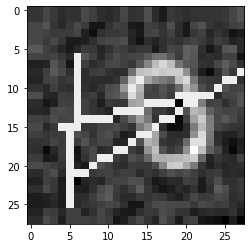

In [ ]:
index = 5

print("Es wird das Bild mit dem index", index, "angezeigt")
plt.imshow(X[index], cmap = "gray"), 
print("Y ist ", Y[index])

In [ ]:
# listen in numpy arrays umwandeln
Y = np.array(Y) # numpy arrays sind für viele Elemente eine bessere Speichermethode
X = np.array(X) # tensorflow benötigt numpy arrays und kann nicht mit listen arbeiten

für das Training werden die Trainingsdaten in Trainingsdaten und Validierungsdaten aufgeteilt. Das neuronale Netz wird auf 80% der Daten trainiert und auf die anderen 20% getestet. Wenn es auf den anderen 20% gut ist, hat das neuronale Netz das Konzept von den Bildern verstanden. wenn es nur auf den Trainingsdaten gut ist und die Testdaten nicht klassifizieren kann, hat es nicht gut gelernt. <br>Tensorflow nimmt immer die letzten x% im Datensatz als Validierungsdaten. In diesem Fall sind die letzten 20% alle Bilder der 8 und der 9. Es würde also von 0 - 7 alles lernen und auf 8 und 9 getestet werden. Das kann so nicht funktionieren, denn wenn das Netzwerk nie eine 8 oder 9 in den Trainingsdaten gesehen hat wird es lernen dass es solche Zahlen nicht gibt. Also müssen die Trainingsdaten gemischt werden um zufällige Zahlen als Validierungsdaten zu erhalten

In [ ]:
# X und Y gleichmäßig mischen
# X und Y werden so gemischt, dass Y[index] die Zahl enthält die in X[index] gespeichert ist
p = np.random.permutation(Y.shape[0]) 
X = X[p]
Y = Y[p] 

# Zufallsveränderungen auf jedes Bild vor dem Training anwenden um allgemeine Lösungen zu finden

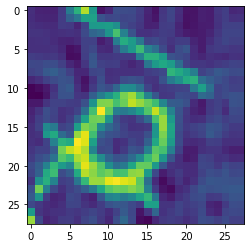

In [ ]:
random_gedreht = tf.keras.layers.RandomRotation((-0.05, 0.05))(X[2].reshape(1,28,28,1), training=True)
random_verschieben = tf.keras.layers.RandomTranslation((-0.05,0.05), (-0.05,0.05)) (random_gedreht, training=True)
random_Zoom = tf.keras.layers.RandomZoom((-0.3,0.1)) (random_verschieben, training=True)

plt.imshow(random_Zoom.numpy()[0].reshape(28,28))

# Neuronales Netzwerk bauen und trainieren

In [ ]:
inputlayer = tf.keras.layers.Input(shape=(28,28)) # unser Bild hat die Form [Höhe, Breite]

bild_3_d = tf.keras.layers.Reshape((28,28,1)) (inputlayer)

random_gedreht = tf.keras.layers.RandomRotation((-0.05, 0.05))(bild_3_d)
random_verschieben = tf.keras.layers.RandomTranslation((-0.05,0.05), (-0.05,0.05)) (random_gedreht)
random_Zoom = tf.keras.layers.RandomZoom((-0.3,0.1)) (random_verschieben)

filter_1 = tf.keras.layers.Conv2D(16,5, activation="relu") (random_Zoom)
drop1 = tf.keras.layers.Dropout(0.2)(filter_1)


filter_2 = tf.keras.layers.Conv2D(16,3, activation="relu") (drop1)
drop2 = tf.keras.layers.Dropout(0.2)(filter_2)

filter_3 = tf.keras.layers.Conv2D(5,1, activation="relu") (drop2) # von 5x5x16 auf 5x5x5


platt = tf.keras.layers.Flatten()(filter_3)

x = tf.keras.layers.Dense(8,activation="relu")(platt)
x = tf.keras.layers.Dropout(0.2)(x)
x = tf.keras.layers.Dense(8,activation="relu")(x)
x = tf.keras.layers.Dropout(0.2)(x)
output = tf.keras.layers.Dense(10,activation="softmax", use_bias = False)(x)

model = tf.keras.Model(inputlayer, output)
print("")
model.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28)]          0         
                                                                 
 reshape (Reshape)           (None, 28, 28, 1)         0         
                                                                 
 random_rotation_14 (RandomR  (None, 28, 28, 1)        0         
 otation)                                                        
                                                                 
 random_translation_14 (Rand  (None, 28, 28, 1)        0         
 omTranslation)                                                  
                                                                 
 random_zoom_14 (RandomZoom)  (None, 28, 28, 1)        0         
                                                                 
 conv2d (Conv2D)             (None, 24, 24, 16)        416  

In [ ]:
fehlerfunktion = tf.keras.losses.SparseCategoricalCrossentropy()
optimierer = tf.keras.optimizers.SGD(0.005, momentum = 0.95)
model.compile(optimierer, fehlerfunktion, metrics="accuracy")

In [ ]:
model.fit(X, Y, batch_size = 64, epochs = 8, validation_split = 0.2) # Parameter optimieren

Epoch 1/8
189/189 [==============================] - 15s 72ms/step - loss: 0.7718 - accuracy: 0.6730 - val_loss: 0.4349 - val_accuracy: 0.7241
Epoch 2/8
189/189 [==============================] - 13s 70ms/step - loss: 0.5101 - accuracy: 0.7106 - val_loss: 0.4497 - val_accuracy: 0.7241
Epoch 3/8
189/189 [==============================] - 13s 70ms/step - loss: 0.4808 - accuracy: 0.7155 - val_loss: 0.4204 - val_accuracy: 0.8301
Epoch 4/8
189/189 [==============================] - 13s 70ms/step - loss: 0.4764 - accuracy: 0.7486 - val_loss: 0.3878 - val_accuracy: 0.9188
Epoch 5/8
189/189 [==============================] - 14s 72ms/step - loss: 0.4273 - accuracy: 0.8132 - val_loss: 0.2243 - val_accuracy: 0.9500
Epoch 6/8
189/189 [==============================] - 13s 70ms/step - loss: 0.3292 - accuracy: 0.8638 - val_loss: 0.1151 - val_accuracy: 0.9612
Epoch 7/8
189/189 [==============================] - 13s 70ms/step - loss: 0.2167 - accuracy: 0.9221 - val_loss: 0.1372 - val_accuracy: 0.9450

In [ ]:
model.save("model.h5") # Netzwerk und Parameter speichern

# Test mit selbstgemaltem Bild
Male eine Zahl mit Paint und lade das Bild in das Colab notebook.

In [ ]:
bild = cv2.imread("2.png", cv2.IMREAD_GRAYSCALE) # bild mit dem Namen untitled.png lesen im graustufen-format
bild = cv2.resize(bild, (28,28))
bild_0_1 = 1 - bild / 255 # bild zwischen 0 und 1 skalieren
plt.imshow(bild_0_1, cmap = "gray")
bild_0_1.shape

In [ ]:
bild_batch = np.reshape(bild_0_1,(1,28,28)) # tensorflow braucht ein array von Inputs

entscheidungen = model(bild_batch)[0]
index = np.argmax(entscheidungen)
print("Die Entscheidungen sind:", entscheidungen)
print("Das ist die Zahl:", index, "mit einer Wahrscheinlichkeit von", entscheidungen.numpy()[index]*100, "%")